Import all required Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Get data from dataset.

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Drop the columns which are probably not so important(May be included by extracting useful information and patterns from that).

In [3]:
df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Try to analyse data.

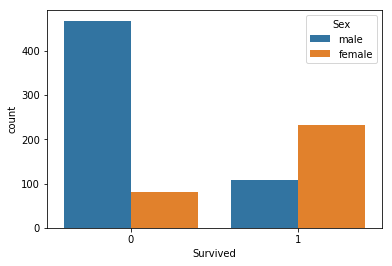

In [4]:
sns.countplot(df["Survived"],hue=df["Sex"])

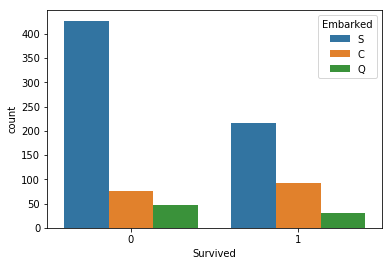

In [5]:
sns.countplot(df["Survived"],hue=df["Embarked"])

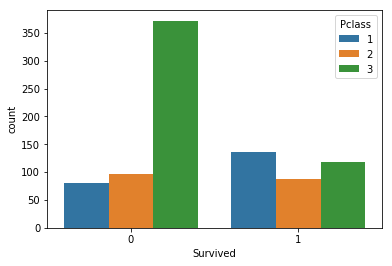

In [6]:
sns.countplot(df["Survived"],hue=df["Pclass"])

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

As there are only 2 null values in embarked, we can just drop them. But for Age we need to replace null values with some suitable values.

In [8]:
df = df[df["Embarked"].notna()]
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Try to understand relationship between Pclass and Age to fill Null values.

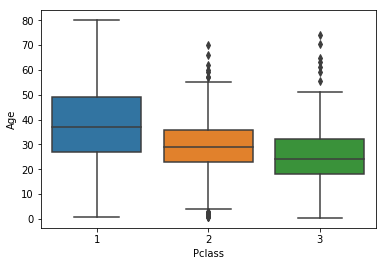

In [9]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [10]:
def find_age(col):
    age = col[0]
    Pclass = col[1]
    if pd.isnull(age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [11]:
df["Age"] = df[["Age","Pclass"]].apply(find_age,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


(array([ 54.,  46., 313., 180., 147.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

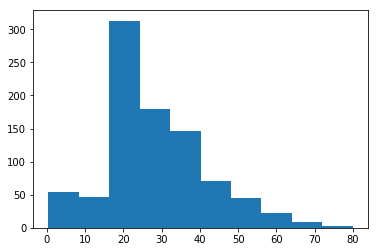

In [12]:
plt.hist(df["Age"])

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Understand relationship between features.

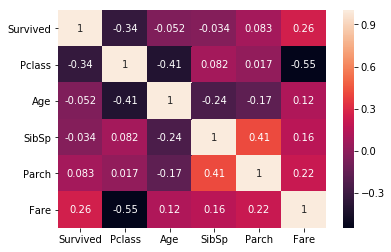

In [14]:
sns.heatmap(df.corr(),annot=True)

Data Preprocessing.

In [15]:
bins= [0,10,20,30,40,50,60,70,80,90]
labels = ['0','1','2','3','4','5','6','7','8']
df['Agegroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,3


In [16]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["S","C","Q"])
df["Embarked"] = le.fit_transform(df["Embarked"])

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
s = scaler.fit(df[["Fare"]])

In [21]:
df["Fare"] = s.transform(df[["Fare"]])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup
0,0,3,male,22.0,1,0,-0.500240,2,2
1,1,1,female,38.0,1,0,0.788947,0,3
2,1,3,female,26.0,0,0,-0.486650,2,2
3,1,1,female,35.0,1,0,0.422861,2,3
4,0,3,male,35.0,0,0,-0.484133,2,3


In [22]:
df["Male"] = pd.get_dummies(df["Sex"],drop_first=True)

In [23]:
df.drop("Sex",inplace=True,axis=1)

In [24]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Agegroup', 'Male'],
      dtype='object')

In [25]:
x = df[['Male','Agegroup','SibSp','Pclass', 'Parch', 'Fare', 'Embarked']].values
y = df["Survived"].values

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree = DecisionTreeClassifier(max_depth=4,random_state=10)

In [30]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [31]:
predict = tree.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,predict)

0.842948717948718

Testing

In [34]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
test.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [36]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [37]:
def find_age(col):
    age = col[0]
    Pclass = col[1]
    if pd.isnull(age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [38]:
test["Age"] = test[["Age","Pclass"]].apply(find_age,axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Agegroup,Male
0,0,3,22.0,1,0,-0.500240,2,2,1
1,1,1,38.0,1,0,0.788947,0,3,0
2,1,3,26.0,0,0,-0.486650,2,2,0
3,1,1,35.0,1,0,0.422861,2,3,0
4,0,3,35.0,0,0,-0.484133,2,3,1


In [39]:
test = test.fillna(df.mean())
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [40]:
test.shape

(418, 8)

In [41]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["S","C","Q"])
test["Embarked"] = le.fit_transform(test["Embarked"])

In [43]:
le.fit(["male","female"])
test["Sex"] = le.fit_transform(test["Sex"])
test["Male"] = pd.get_dummies(test["Sex"],drop_first=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male
0,892,3,1,34.5,0,0,7.8292,1,1
1,893,3,0,47.0,1,0,7.0000,2,0
2,894,2,1,62.0,0,0,9.6875,1,1
3,895,3,1,27.0,0,0,8.6625,2,1
4,896,3,0,22.0,1,1,12.2875,2,0


In [44]:
scaler = StandardScaler()

In [45]:
s = scaler.fit(test[["Fare"]])

In [46]:
test["Fare"] = s.transform(test[["Fare"]])
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male
0,892,3,1,34.5,0,0,-0.496637,1,1
1,893,3,0,47.0,1,0,-0.511497,2,0
2,894,2,1,62.0,0,0,-0.463335,1,1
3,895,3,1,27.0,0,0,-0.481704,2,1
4,896,3,0,22.0,1,1,-0.416740,2,0


In [47]:
bins= [0,10,20,30,40,50,60,70,80,90]
labels = ['0','1','2','3','4','5','6','7','8']
test['Agegroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male,Agegroup
0,892,3,1,34.5,0,0,-0.496637,1,1,3
1,893,3,0,47.0,1,0,-0.511497,2,0,4
2,894,2,1,62.0,0,0,-0.463335,1,1,6
3,895,3,1,27.0,0,0,-0.481704,2,1,2
4,896,3,0,22.0,1,1,-0.416740,2,0,2


In [48]:
x = test[['Male', 'Agegroup', 'SibSp','Pclass', 'Parch', 'Fare', 'Embarked']].values

In [49]:
ypredict = tree.predict(x)
ypredict

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [50]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':ypredict})

In [51]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [52]:
filename = 'Titanic1.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Titanic1.csv


In [53]:
submission.shape

(418, 2)